<a href="https://colab.research.google.com/github/harishnk28/Alexnetvsownmodel/blob/main/AlexNetvsOwnmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Write a program to implement the AlexNet model (Note : You can use any publically available dataset for testing). While implementing you have to show following things:

In [41]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)

#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(32,32,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(32,32,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.4))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.4))

#Output Layer
AlexNet.add(Dense(10))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 8, 8, 96)          34944     
_________________________________________________________________
batch_normalization_18 (Batc (None, 8, 8, 96)          384       
_________________________________________________________________
activation_19 (Activation)   (None, 8, 8, 96)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_19 (Batc (None, 4, 4, 256)         1024      
_________________________________________________________________
activation_20 (Activation)   (None, 4, 4, 256)        

In [42]:
# Compiling the model
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])

# Display the first convolution function kernel filter coefficient values

[[[-0.01160643  0.01362201  0.01118555 ... -0.00442451  0.01514127
   -0.00722753]
  [ 0.00715473 -0.01642123  0.01068707 ... -0.01840068  0.01831171
   -0.01107755]
  [-0.01084392 -0.02031346 -0.01192883 ... -0.0218694   0.00358693
   -0.02087749]
  ...
  [-0.02148671 -0.00849788 -0.0043692  ...  0.0170253  -0.0088843
    0.01822878]
  [-0.01203409 -0.01754473  0.0214814  ...  0.01032368  0.01265484
   -0.00308908]
  [ 0.0096582   0.01822412 -0.01844897 ... -0.0121752  -0.01991683
   -0.00578164]]

 [[-0.00053012 -0.00784166  0.01022322 ...  0.02012219  0.01683983
   -0.00302318]
  [ 0.00397655  0.01064915  0.00698235 ... -0.0127516   0.00129951
   -0.01991779]
  [ 0.01178302 -0.00448849  0.00896536 ...  0.01810354 -0.01205853
    0.01438497]
  ...
  [-0.01300122 -0.00859883 -0.01433072 ... -0.01354419 -0.00229368
   -0.01845009]
  [-0.01128334 -0.00266441 -0.02106933 ...  0.02091808  0.00496999
    0.01435952]
  [-0.01355862  0.01047266  0.00846023 ... -0.00206871 -0.00706748
   -0.0

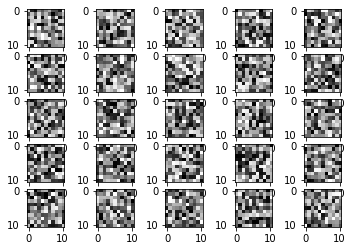

In [44]:
from keras.models import Sequential

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

import matplotlib.pyplot as plt

x1w = AlexNet.layers[0].get_weights()[0][:,:,0,:]
print(x1w)
for i in range(1,26):

      plt.subplot(5,5,i)

      plt.imshow(x1w[:,:,i],interpolation="nearest",cmap="gray")

plt.show()

# Display the total images in the database, size of the image, no of classes in the database.

In [4]:
#Keras library for CIFAR dataset
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test)=cifar10.load_data()

#Train-validation-test split
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

#Dimension of the CIFAR10 dataset
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

#Onehot Encoding the labels.
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical

#Since we have 10 classes we should expect the shape[1] of y_train,y_val and y_test to change from 1 to 10
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

#Verifying the dimension after one hot encoding
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

#Image Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1 )

val_generator = ImageDataGenerator(rotation_range=2, horizontal_flip=True,zoom_range=.1)

test_generator = ImageDataGenerator(rotation_range=2, horizontal_flip= True,zoom_range=.1)

#Fitting the augmentation defined above to the data
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

170500096/170498071 [==============================] - 11s 0us/step
((35000, 32, 32, 3), (35000, 1))
((15000, 32, 32, 3), (15000, 1))
((10000, 32, 32, 3), (10000, 1))
((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


# Display sample input and output images (at least 10 images)

Train: X=(35000, 32, 32, 3), y=(35000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


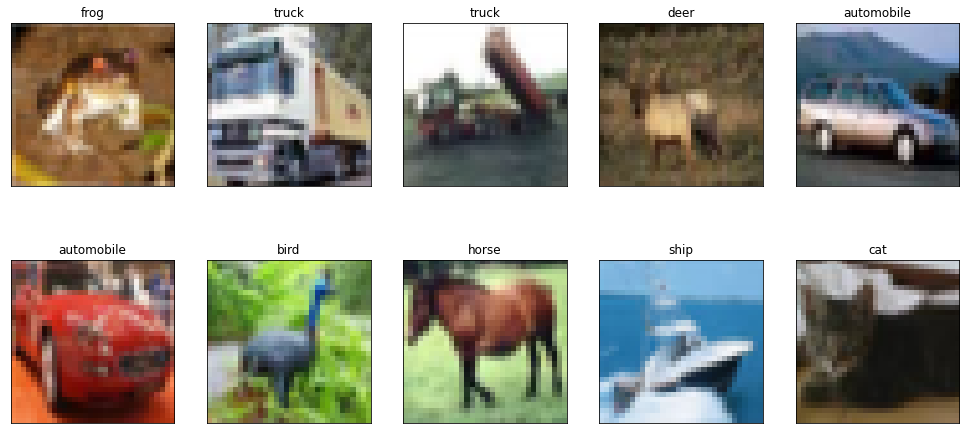

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#Keras library for CIFAR dataset
from keras.datasets import cifar10
disp=cifar10.load_data()
(trainX, trainy), (testX, testy) = cifar10.load_data()
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

labels = ['airplane','automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(17, 8))
index = 0
for i in range(2):
    for j in range(5):
        axes[i,j].set_title(labels[trainy[index][0]])
        axes[i,j].imshow(trainX[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [6]:
#Learning Rate Annealer
from keras.callbacks import ReduceLROnPlateau
lrr= ReduceLROnPlateau(monitor='val_acc',   factor=.01,   patience=3,  min_lr=1e-5) 

In [7]:
#Defining the parameters
batch_size= 100
epochs=20
learn_rate=.001

# Display the training accuracy / training error

In [8]:
#Training the model
AlexNet.fit_generator(train_generator.flow(x_train, y_train, batch_size=batch_size), epochs = epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size=batch_size), validation_steps = 250, callbacks = [lrr], verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
350/350 [==============================] - 622s 2s/step - loss: 1.8268 - accuracy: 0.3412 - val_loss: 2.1747 - val_accuracy: 0.2749
Epoch 2/20
350/350 [==============================] - 601s 2s/step - loss: 1.4454 - accuracy: 0.4862
Epoch 3/20
350/350 [==============================] - 587s 2s/step - loss: 1.3093 - accuracy: 0.5425
Epoch 4/20
350/350 [==============================] - 586s 2s/step - loss: 1.2098 - accuracy: 0.5777
Epoch 5/20
350/350 [==============================] - 589s 2s/step - loss: 1.1391 - accuracy: 0.6071
Epoch 6/20
350/350 [==============================] - 587s 2s/step - loss: 1.0641 - accuracy: 0.6349
Epoch 7/20
350/350 [==============================] - 591s 2s/step - loss: 1.0321 - accuracy: 0.6474
Epoch 8/20
350/350 [==============================] - 594s 2s/step - loss: 0.9746 - accuracy: 0.6659
Epoch 9/20
350/350 [==============================] - 600s 2s/step - loss: 0.9077 - accuracy: 0.6908
Epoch 10/20
350/350 [============================

# Filter after fit with train values in Layer 1

In [9]:
filters, biases = AlexNet.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them 
f_min, f_max = filters.min(), filters.max() 
filters = (filters - f_min) / (f_max - f_min)
print(filters)

[[[[0.5193868  0.56952566 0.59057134 ... 0.6477307  0.6263468
    0.59495974]
   [0.55220056 0.57242584 0.5748958  ... 0.5830555  0.6334262
    0.54408777]
   [0.46666142 0.62003094 0.49221376 ... 0.5101153  0.7756139
    0.5641855 ]]

  [[0.50026494 0.5703607  0.58881307 ... 0.691434   0.6527491
    0.59551066]
   [0.55052084 0.5138407  0.5995545  ... 0.6404037  0.67045546
    0.5886657 ]
   [0.46182135 0.51479083 0.51825917 ... 0.5380219  0.70894676
    0.5751574 ]]

  [[0.577331   0.5791443  0.5972899  ... 0.69240147 0.64374214
    0.5591179 ]
   [0.5546605  0.52776355 0.57910067 ... 0.5960676  0.6256832
    0.54690635]
   [0.5234891  0.5609988  0.5603266  ... 0.58039695 0.6252591
    0.59315366]]

  ...

  [[0.7400298  0.5494917  0.67404115 ... 0.5531539  0.55680287
    0.3637226 ]
   [0.63537914 0.6497312  0.5665257  ... 0.5513861  0.6685528
    0.3985518 ]
   [0.59352964 0.6210469  0.4746836  ... 0.55764073 0.54191935
    0.47741142]]

  [[0.66250724 0.54530805 0.7161895  ... 0.5

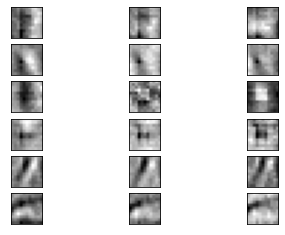

In [10]:
from matplotlib import pyplot
#plot first few filters 
n_filters, ix = 6, 1 
for i in range(n_filters):

  # get the filter
  f = filters[:, :, :, i]
  # plot each channel separately
  for j in range(3):
# specify subplot and turn of axis 
    ax = pyplot.subplot(n_filters, 3, ix) 
    ax.set_xticks([]) 
    ax.set_yticks([])
# plot filter channel in grayscale 
    pyplot.imshow(f[:, :, j], cmap='gray') 
    ix += 1 
# show the figure 
pyplot.show()

# Display the testing accuracy

In [11]:
#Making prediction
from mlxtend.plotting import plot_confusion_matrix
y_pred=AlexNet.predict_classes(x_test)
y_true=np.argmax(y_test,axis=1)
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx=confusion_matrix(y_true,y_pred)
print(confusion_mtx)
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_true, y_pred)
print('Accuracy Score = ', acc_score)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[959   8  18   0   0   0   0   0   1  14]
 [152 774   6   0   0   0   0   0   2  66]
 [296  11 641   0   2   0   3   7   0  40]
 [513  53 229  10   4   0  28  20   7 136]
 [465   5 285   0 137   0  20  62   0  26]
 [258  55 411   3   8   6  20  60  14 165]
 [177  34 266   0   1   0 445   2   5  70]
 [302   6  81   0   2   0   0 494   1 114]
 [605  79   9   0   0   0   0   0 267  40]
 [246 120  10   0   0   0   0   0   5 619]]
Accuracy Score =  0.4352


# 2. Write a program to implement the new CNN model. The model should contains following things : (Note : use any grayscale dataset with the 10 classes)

In [46]:
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in trainX])
X_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in testX])
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32)
(10000, 32, 32)


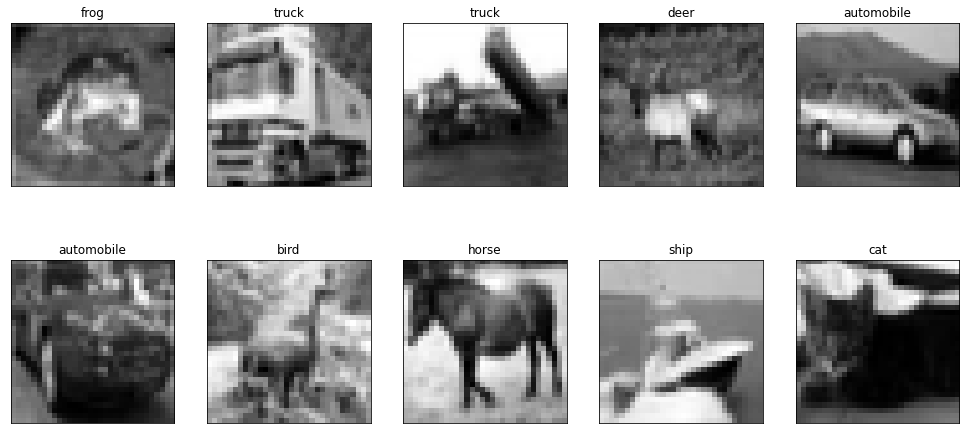

In [13]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(17, 8))
index = 0
for i in range(2):
    for j in range(5):
        axes[i,j].set_title(labels[trainy[index][0]])
        axes[i,j].imshow(X_train[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [14]:
X_train  = X_train/255
X_test  = X_test/255

In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(trainy)
y_train = one_hot_encoder.transform(trainy)
y_test = one_hot_encoder.transform(testy)
y_train = one_hot_encoder.transform(trainy)
y_test = one_hot_encoder.transform(testy)
print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [16]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [17]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)

(32, 32, 1)


In [18]:
#Importing library
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

In [19]:
#Defining the parameters
batch_size= 100
epochs=10
learn_rate=.001

In [20]:
model = Sequential()
model.add(Conv2D(6,(5,5),strides=1,input_shape=input_shape))
model.add(Activation('relu'))
model.add(AveragePooling2D(pool_size=(5, 5), strides=(2,2), padding='same'))
model.add(Conv2D(6, (5, 5), activation ='relu'))
model.add(AveragePooling2D(pool_size=(5, 5), strides=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(120, activation ='relu'))
model.add(Dense(84, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
# training the model
model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer = keras.optimizers.SGD(lr = 0.01),
              metrics =['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
activation_18 (Activation)   (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 6)         906       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 6)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 150)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 120)              

In [21]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])

In [22]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [23]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 34s 21ms/step - loss: 2.0389 - acc: 0.2494 - val_loss: 1.6668 - val_acc: 0.3996
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.6607 - acc: 0.4028 - val_loss: 1.6096 - val_acc: 0.4284
Epoch 3/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5722 - acc: 0.4333 - val_loss: 1.5388 - val_acc: 0.4491
Epoch 4/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5112 - acc: 0.4587 - val_loss: 1.5715 - val_acc: 0.4352
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4719 - acc: 0.4772 - val_loss: 1.4401 - val_acc: 0.4807
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4422 - acc: 0.4933 - val_loss: 1.4458 - val_acc: 0.4833
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.4242 - acc: 0.4976 - val_loss: 1.4208 - val_acc: 0.4953
Epoch 8/20
1563/1563 [==========================

In [24]:
model.save('CNN_CIFAR.h5')

In [25]:
from keras.models import Sequential, load_model
model = load_model('CNN_CIFAR.h5')

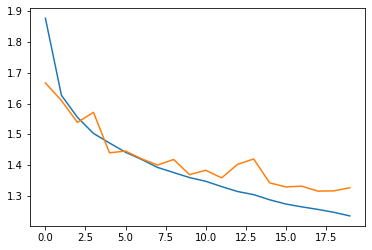

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [29]:
predictions = model.predict(X_test)

In [38]:
cm = confusion_matrix(y_test, predictions)
cm

array([[459,  74, 130,  11,  27,   7,  15,  30, 189,  58],
       [ 23, 700,  20,  12,   6,   3,  32,  14,  70, 120],
       [ 75,  29, 480,  71,  87,  60,  58,  62,  46,  32],
       [ 28,  48, 135, 269,  95, 137, 101,  69,  43,  75],
       [ 27,  42, 156,  41, 397,  41, 112, 131,  33,  20],
       [ 15,  27, 105, 178,  50, 371,  55, 125,  30,  44],
       [ 13,  81,  77,  55,  43,  11, 593,  28,  30,  69],
       [ 15,  37,  39,  50,  61,  53,  23, 625,  12,  85],
       [ 60,  78,  31,  15,   8,   8,   4,   7, 740,  49],
       [ 20, 150,  10,  26,   1,  12,  21,  32,  49, 679]])

In [39]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predictions)
print('Accuracy Score = ', acc_score)

Accuracy Score =  0.5313
